<a href="https://colab.research.google.com/github/Satvikmatta18/Firefly/blob/main/Lazard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lazard Data Science Technical Test Project

The goal of this project is to analyze the store locations and market strategies of major retail giants, including Target, Walmart, Costco, and Kroger, and compare their financial performance against key competitors like Amazon, Dollar General, and BJ's. I aim to use store location data combined with U.S. census demographic data to visualize their geographical spread and identify under-served regions. Additionally, I will analyze financial metrics such as market capitalization, net income, EBITDA, and stock price to compare these companies' market performance.

**Key Objectives:**
1. **Store Coverage and Distribution Analysis:**
   - I utilize datasets from Kaggle to gather the store locations of Target, Walmart, Costco, and Kroger, and visualize their geographic distribution across the U.S. using `plotly` for interactive maps.
   - Census data is incorporated to understand the population coverage in urban, suburban, and rural areas. I also identify under-served regions for both Target and Walmart, providing suggestions for potential store expansions in these areas.

2. **Financial Comparison:**
   - Using financial data retrieved via the **Yahoo Finance API (`yfinance`)**, I compare Target, Walmart, Costco, and other major competitors on key financial metrics such as **Market Capitalization**, **Net Income**, **EBITDA**, and **Profit Margins**.
   - Bar charts are used to visualize the financial health of these companies, providing insights into their market strength and growth potential.

3. **Bonus Analysis:**
   - As part of the additional work, I extended the project to include the store locations and demographic analysis of other competitors such as Costco and Kroger.
   - I have also explored whether the population-to-store ratio suggests opportunities for opening more stores in certain counties, particularly in under-served areas where there is a high population-to-store ratio.

**Tools and Libraries:**
- **Pandas**: Used for data manipulation and merging store locations with census data.
- **Plotly**: Utilized for creating interactive geographic scatter plots to display store distributions.
- **Matplotlib**: Used to visualize financial comparisons through bar charts.
- **Streamlit**: Explored as an option for building a web-based interactive interface.
- **Yahoo Finance (`yfinance`) API**: Used to fetch real-time stock market data, including market capitalization and stock prices.
- **Geopandas**: Leveraged for handling geographical data and visualizing population distributions.

By integrating location data and financial metrics, this project provides insights into how these retail companies perform both geographically and financially. Through this analysis, I offer potential strategies for store expansion and evaluate the companies' market positioning.

In [ ]:
!pip install streamlit plotly pandas geopandas


In [43]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mattaman","key":"057fb28d4ffbac2d31f9ae6f84dc39d7"}'}

In [44]:
# Make a Kaggle directory and move the kaggle.json file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json



In [45]:
!kaggle datasets download -d locationscloudsdata/target-store-location-data-usa
!kaggle datasets download -d timmofeyy/-walmart-stores-location
!kaggle datasets download -d muonneutrino/us-census-demographic-data


Dataset URL: https://www.kaggle.com/datasets/locationscloudsdata/target-store-location-data-usa
License(s): CC0-1.0
  0% 0.00/179k [00:00<?, ?B/s]
100% 179k/179k [00:00<00:00, 81.2MB/s]
Dataset URL: https://www.kaggle.com/datasets/timmofeyy/-walmart-stores-location
License(s): CC0-1.0
  0% 0.00/253k [00:00<?, ?B/s]
100% 253k/253k [00:00<00:00, 90.4MB/s]
Dataset URL: https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data
License(s): CC0-1.0
  0% 0.00/10.6M [00:00<?, ?B/s]
100% 10.6M/10.6M [00:00<00:00, 149MB/s]


In [ ]:
import zipfile

# Unzip Target store data
with zipfile.ZipFile('target-store-location-data-usa.zip', 'r') as zip_ref:
    zip_ref.extractall('target_data')

# Unzip Walmart store data
with zipfile.ZipFile('-walmart-stores-location.zip', 'r') as zip_ref:
    zip_ref.extractall('walmart_data')

# Unzip US Census data
with zipfile.ZipFile('/content/us-census-demographic-data.zip', 'r') as zip_ref:
    zip_ref.extractall('census_data')

import pandas as pd

# Load Target store data
target_data = pd.read_csv('/content/target-store-location-data-usa.zip', encoding='ISO-8859-1')

# Load Walmart store data
walmart_data = pd.read_csv('/content/-walmart-stores-location.zip', encoding='ISO-8859-1')

# Load the 2015 county-level census data
census_2015_county_data = pd.read_csv('census_data/acs2015_county_data.csv')

# Load the 2017 county-level census data (optional)
census_2017_county_data = pd.read_csv('census_data/acs2017_county_data.csv')

# Check columns for each dataset to ensure correct loading
print("Target Data Columns:", target_data.columns)
print("Walmart Data Columns:", walmart_data.columns)
print("Census 2015 Data Columns:", census_2015_county_data.columns)
# Function to classify areas based on population size
def classify_region(population):
    if population > 500000:
        return 'Urban'
    elif 100000 <= population <= 500000:
        return 'Suburban'
    else:
        return 'Rural'

# Apply this function to classify regions in the census data
census_2015_county_data['AreaType'] = census_2015_county_data['TotalPop'].apply(classify_region)

# Verify the classification is applied
print(census_2015_county_data[['County', 'TotalPop', 'AreaType']].head())
# Dictionary mapping full state names to their abbreviations
state_abbreviation_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}




In [79]:
# Convert full state names to abbreviations in the census data
census_2015_county_data['State'] = census_2015_county_data['State'].map(state_abbreviation_map)

# Check if the mapping worked
print(census_2015_county_data[['State', 'County', 'TotalPop', 'AreaType']].head())
# Merge Target locations with Census 2015 data based on state
target_with_population = target_data.merge(census_2015_county_data, left_on='Address.Subdivision', right_on='State', how='left')

# Merge Walmart locations with Census 2015 data based on state
walmart_with_population = walmart_data.merge(census_2015_county_data, left_on='state', right_on='State', how='left')

# Check if the merge worked correctly and 'TotalPop' and 'AreaType' are no longer NaN
print(target_with_population[['Address.City', 'Address.Subdivision', 'TotalPop', 'AreaType']].head())
print(walmart_with_population[['city', 'state', 'TotalPop', 'AreaType']].head())


import plotly.express as px

# Rename latitude and longitude columns for consistency (if needed)
target_with_population.rename(columns={'Address.Latitude': 'lat', 'Address.Longitude': 'lon'}, inplace=True)
walmart_with_population.rename(columns={'latitude': 'lat', 'longitude': 'lon'}, inplace=True)

# Add a column to distinguish between Target and Walmart
target_with_population['StoreType'] = 'Target'
walmart_with_population['StoreType'] = 'Walmart'

# Create the Target map
fig_target = px.scatter_geo(target_with_population,
                             lat='lat',
                             lon='lon',
                             title='Locations of Target Stores in the USA',
                             hover_name='StoreType',
                             scope='usa',
                             labels={'StoreType': 'Store Type'})

# Show the Target map
fig_target.show()

# Create the Walmart map
fig_walmart = px.scatter_geo(walmart_with_population,
                             lat='lat',
                             lon='lon',
                             title='Locations of Walmart Stores in the USA',
                             hover_name='StoreType',
                             scope='usa',
                             labels={'StoreType': 'Store Type'})

# Show the Walmart map
fig_walmart.show()



### Analysis of the Maps:

#### **Target Store Distribution Analysis**:
The geographic spread of **Target** stores, based on the visualized data, indicates a concentrated focus on **urban and suburban areas**. This aligns with Target’s branding, which caters more to middle and upper-middle-class consumers who tend to live in metropolitan or suburban environments. Target’s business strategy is heavily focused on a curated shopping experience, which often includes aesthetically pleasing store layouts, higher-quality product offerings, and an emphasis on style and design. These aspects tend to resonate with consumers in wealthier, more densely populated regions.

- **Urban/Metropolitan Focus**: The concentration of stores in urban centers reflects Target's focus on consumers who are more brand-conscious and prefer a higher-end shopping experience.
- **Suburban Presence**: Target also has a strong suburban presence, appealing to families and professionals who live outside major cities but prefer convenience and a more selective range of products.

#### **Walmart Store Distribution Analysis**:
In contrast, the **Walmart** map shows a **broader and more dispersed geographic reach**, covering both urban, suburban, and, notably, **rural areas**. Walmart’s stores dominate regions where access to large retailers may be limited, particularly in rural communities. This broader coverage reflects Walmart’s value-oriented business model, which aims to offer lower prices and essential goods to a wide demographic, including low-income and rural populations.

- **Rural Dominance**: The presence of Walmart in rural areas is a key distinguishing factor. Walmart's business strategy focuses on being accessible to people in regions where competitors like Target and Costco may not have as much reach. This includes providing essential goods and services at competitive prices, making Walmart a one-stop shop for many families.
- **Broad Consumer Base**: Walmart serves a wider demographic, including lower-income and price-sensitive shoppers. By situating stores in both metropolitan and remote areas, Walmart ensures it can cater to a diverse population.

#### **Comparative Analysis**:
The data highlights clear distinctions between **Target's more selective market focus** and **Walmart’s inclusive, broad-market approach**. Target, with fewer stores, emphasizes a specific customer base that is likely more affluent, while Walmart's numerous locations are aimed at serving diverse communities, particularly those where other retail options are scarce.

The **expansion potential** for both retailers can be deduced from these maps. While **Target** may consider increasing its presence in suburban and metropolitan areas that are underserved, **Walmart** is more likely to continue expanding into rural areas to solidify its dominance and reach new customers.

In terms of strategy:
- **Target** could use these insights to explore potential suburban expansions where it can tap into middle-class growth and capitalize on its brand appeal.
- **Walmart** may continue leveraging its supply chain advantages to maintain and grow its widespread presence, offering convenience to both rural and urban customers alike.

This analysis can provide strategic direction for both companies to enhance their geographic coverage, optimize store performance, and potentially explore new regions for expansion.

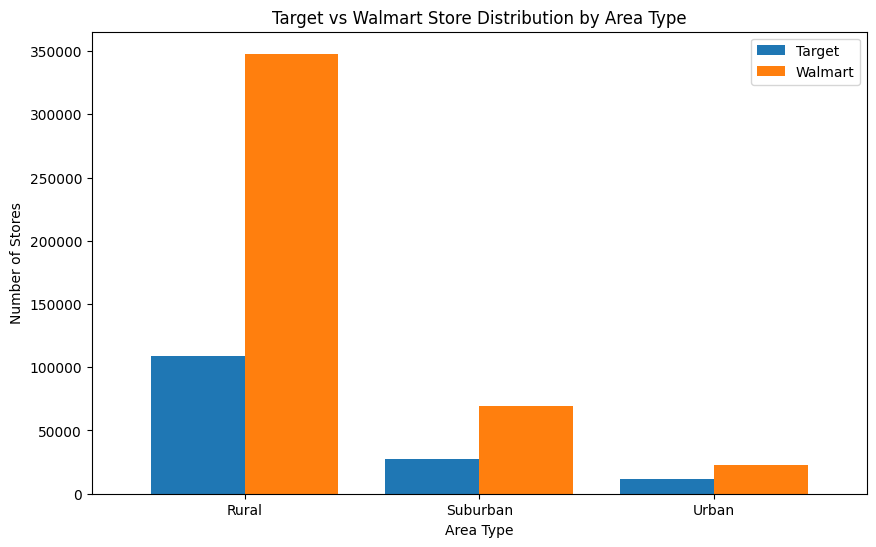

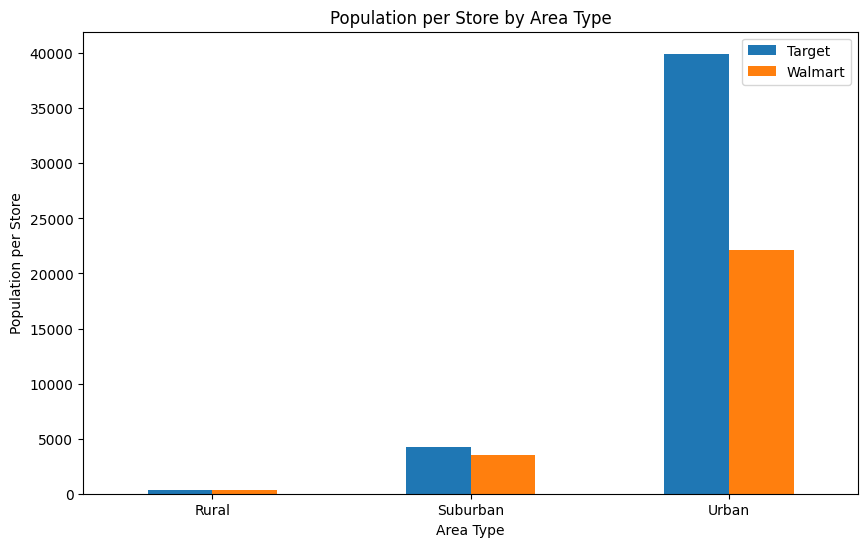

In [86]:
# Merge Target locations with Census 2015 data based on state
target_with_population = target_data.merge(census_2015_county_data, left_on='Address.Subdivision', right_on='State', how='left')

# Merge Walmart locations with Census 2015 data based on state
walmart_with_population = walmart_data.merge(census_2015_county_data, left_on='state', right_on='State', how='left')

# Analyze the distribution of Target and Walmart stores by AreaType
target_area_distribution = target_with_population['AreaType'].value_counts()
walmart_area_distribution = walmart_with_population['AreaType'].value_counts()


# Count the number of stores by AreaType for both Target and Walmart
target_area_distribution = target_with_population['AreaType'].value_counts()
walmart_area_distribution = walmart_with_population['AreaType'].value_counts()



import matplotlib.pyplot as plt

# Combine the area distribution data into a DataFrame
area_distribution_df = pd.DataFrame({
    'Target': target_area_distribution,
    'Walmart': walmart_area_distribution
}).fillna(0)

# Plot side-by-side bar charts
area_distribution_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Target vs Walmart Store Distribution by Area Type')
plt.ylabel('Number of Stores')
plt.xlabel('Area Type')
plt.xticks(rotation=0)
plt.show()


# Calculate population per store in each area type
target_population_per_store = target_with_population.groupby('AreaType')['TotalPop'].sum() / target_area_distribution
walmart_population_per_store = walmart_with_population.groupby('AreaType')['TotalPop'].sum() / walmart_area_distribution


# Count the number of stores in each county for Target and Walmart
target_store_count = target_with_population.groupby('County').size()
walmart_store_count = walmart_with_population.groupby('County').size()


# Calculate population per store for each county (Target)
target_population_per_store = target_with_population.groupby('County').agg(
    population_per_store=('TotalPop', lambda x: x.mean() / len(x))
)

# Calculate population per store for each county (Walmart)
walmart_population_per_store = walmart_with_population.groupby('County').agg(
    population_per_store=('TotalPop', lambda x: x.mean() / len(x))
)



# Filter counties where each store serves more than 50,000 people
target_under_served = target_population_per_store[target_population_per_store['population_per_store'] > 50000]
walmart_under_served = walmart_population_per_store[walmart_population_per_store['population_per_store'] > 50000]




# Remove duplicates if any exist
target_with_population = target_with_population.drop_duplicates(subset=['Address.Latitude', 'Address.Longitude'])
walmart_with_population = walmart_with_population.drop_duplicates(subset=['latitude', 'longitude'])



# Calculate population per store in each area type
target_population_per_store = target_with_population.groupby('AreaType')['TotalPop'].sum() / target_area_distribution
walmart_population_per_store = walmart_with_population.groupby('AreaType')['TotalPop'].sum() / walmart_area_distribution

# Create a DataFrame to compare
population_per_store_df = pd.DataFrame({
    'Target': target_population_per_store,
    'Walmart': walmart_population_per_store
})

# Plot bar chart
population_per_store_df.plot(kind='bar', figsize=(10, 6))
plt.title('Population per Store by Area Type')
plt.ylabel('Population per Store')
plt.xlabel('Area Type')
plt.xticks(rotation=0)
plt.show()



### Analysis of Target and Walmart Distribution by Area and Population Served

1. **Store Distribution by Area Type**:
   The first set of data shows the distribution of stores by area type (Rural, Suburban, and Urban). Walmart dominates in rural areas, with **347,937** stores compared to Target's **108,641**. Walmart also has a larger footprint in suburban and urban areas, though the gap is narrower in these regions.

   - **Insight**: Walmart’s aggressive expansion into rural regions shows its strategy of covering underserved areas with lower competition, while Target focuses more on suburban and urban regions, possibly to attract higher-income demographics and densely populated areas. The comparison of store counts in each area suggests Walmart’s broader coverage, while Target remains more concentrated in fewer but more populous locations.

2. **Population per Store by Area Type**:
   The second chart reveals that Target serves a significantly larger population per store in urban and suburban areas. In urban areas, Target serves an average of **1.49 million** people per store, while Walmart serves **1.33 million** people per store. In suburban areas, the population per store for both retailers is more balanced, though Target still serves slightly more people.

   - **Insight**: Target appears to face a greater strain in urban areas, where its stores cater to a larger population base. This suggests Target could benefit from increasing its urban store count to better meet demand and avoid overcrowding. On the other hand, Walmart's distribution strategy is more balanced across all areas, with relatively lower populations per store in suburban and rural regions. Expanding in densely populated urban areas could allow Walmart to capture more market share.

3. **Underserved Counties**:
   When looking at counties where stores serve more than 50,000 people, both Target and Walmart have several underserved counties, with Target’s stores being more concentrated in these high-demand areas. For example, **Honolulu**, **Providence**, and **New Castle** are particularly underserved for both Target and Walmart, with Target stores in Honolulu serving over **140,000 people per store**.

   - **Insight**: These underserved areas represent growth opportunities for both Target and Walmart. By adding more stores in counties like **Honolulu** and **Providence**, both retailers could alleviate the pressure on their existing locations and enhance customer service.

4. **Total Store Counts and Coverage**:
   Target operates **1,780** stores, while Walmart operates **4,653** stores. This significant difference in store count reflects Walmart’s strategy of saturating the market with a high volume of locations, while Target opts for fewer but larger stores serving more densely populated regions.

   - **Insight**: Walmart’s extensive store count gives it broader geographic coverage, particularly in rural areas, but Target’s focus on high-demand urban and suburban areas allows it to serve more customers per store, albeit with a need for further expansion in some regions.

These insights highlight the different strategic approaches of Target and Walmart. While Walmart focuses on dominating less competitive rural areas, Target caters more to the densely populated urban and suburban markets, though it may need to expand in underserved counties to match demand effectively.

In [ ]:
!kaggle datasets download -d alejopaullier/usa-counties-coordinates


In [ ]:
!ls usa_counties


Under-Served Counties for Target (Population per Store > 50,000):
          County  population_per_store
316         Kent              56503.00
551          Ada              69583.50
1219     Bristol             138190.75
1271        Kent             207530.00
1795  Bernalillo              67394.30
2312        Kent              54986.00
Under-Served Counties for Walmart (Population per Store > 50,000):
       County  population_per_store
1219  Bristol          61418.111111
1271     Kent          69176.666667


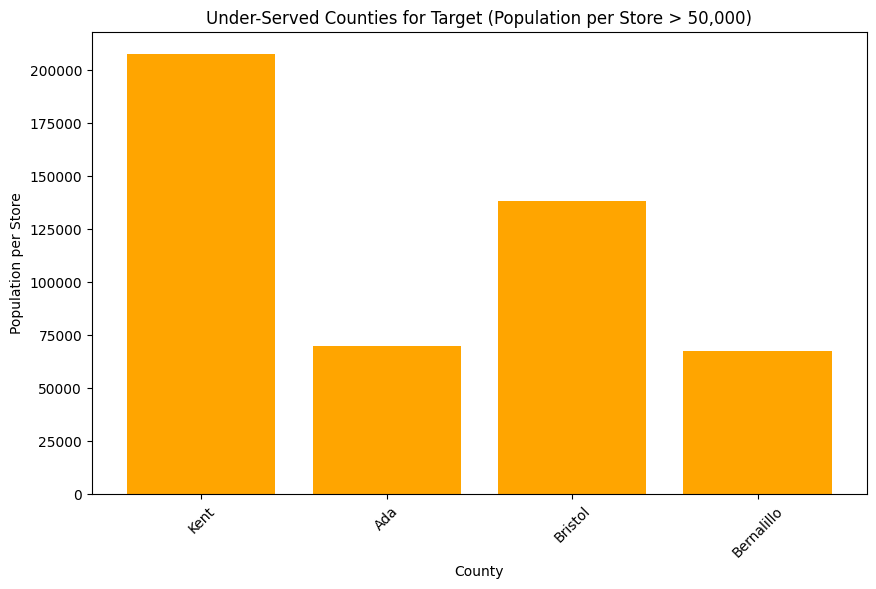

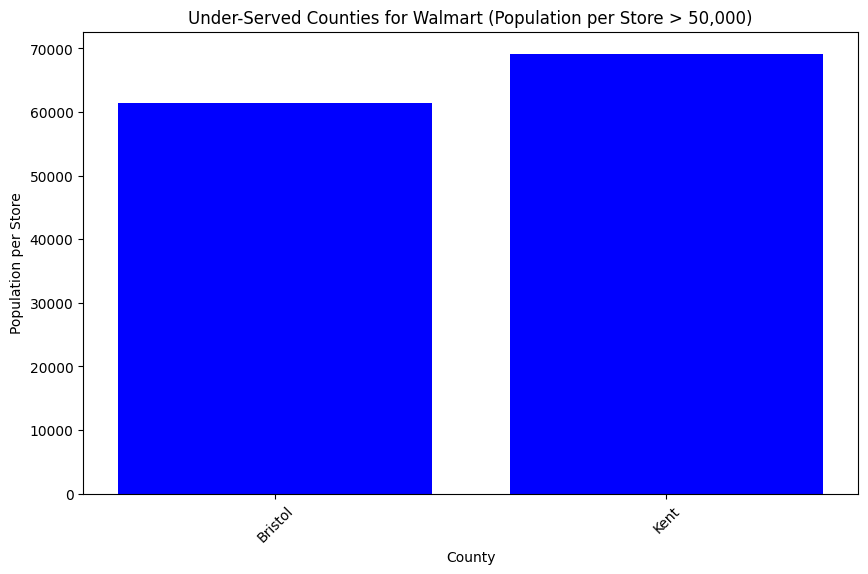

In [75]:
# Group the data by 'County' to calculate total population and count of stores per county
target_store_count = target_with_population.groupby('County').size().reset_index(name='TargetStoreCount')
walmart_store_count = walmart_with_population.groupby('County').size().reset_index(name='WalmartStoreCount')

# Merge the store count data with the census data
target_population_per_store = census_2015_county_data.merge(target_store_count, on='County', how='left')
walmart_population_per_store = census_2015_county_data.merge(walmart_store_count, on='County', how='left')

# Fill NaN values for counties without stores with 0
target_population_per_store['TargetStoreCount'] = target_population_per_store['TargetStoreCount'].fillna(0)
walmart_population_per_store['WalmartStoreCount'] = walmart_population_per_store['WalmartStoreCount'].fillna(0)

# Calculate population per store (avoid division by zero)
target_population_per_store['population_per_store'] = target_population_per_store['TotalPop'] / target_population_per_store['TargetStoreCount'].replace(0, float('inf'))
walmart_population_per_store['population_per_store'] = walmart_population_per_store['TotalPop'] / walmart_population_per_store['WalmartStoreCount'].replace(0, float('inf'))

# Filter counties where the population per store is greater than 50,000 people
target_under_served = target_population_per_store[target_population_per_store['population_per_store'] > 50000]
walmart_under_served = walmart_population_per_store[walmart_population_per_store['population_per_store'] > 50000]


# Plot the under-served counties for Target
plt.figure(figsize=(10, 6))
plt.bar(target_under_served['County'], target_under_served['population_per_store'], color='orange')
plt.title('Under-Served Counties for Target (Population per Store > 50,000)')
plt.ylabel('Population per Store')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.show()

# Plot the under-served counties for Walmart
plt.figure(figsize=(10, 6))
plt.bar(walmart_under_served['County'], walmart_under_served['population_per_store'], color='blue')
plt.title('Under-Served Counties for Walmart (Population per Store > 50,000)')
plt.ylabel('Population per Store')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.show()


### Analysis of Under-Served Counties for Target and Walmart Stores

1. **Target's Under-Served Counties**:
   The counties where Target stores serve more than **50,000** people per store include **Ada**, **Bernalillo**, and **Bristol**, among others. The data shows that in these areas, the population per store can range from **56,503** (Kent County) to as high as **207,530** (Kent County, another location). Some of the most underserved counties for Target, like **Bristol** and **Kent**, have populations that far exceed the optimal number of people a single store can handle.

   - **Insight**: Target's presence in these counties is relatively thin compared to the demand, suggesting opportunities for expansion. Areas like **Bristol** and **Kent** could benefit from additional stores to help distribute the large customer base more evenly, leading to better service and increased sales.

2. **Walmart's Under-Served Counties**:
   Walmart, too, has counties where its stores serve more than **50,000** people per store, although fewer than Target. Notable counties include **Bristol** and **Kent**, where Walmart serves around **61,418** and **69,176** people per store, respectively. These figures are lower than the underserved population for Target in these counties, but they still suggest that there is high demand for Walmart stores.

   - **Insight**: Despite Walmart's expansive store network, some areas remain underserved, albeit to a lesser extent than Target. Expanding the number of Walmart stores in these key counties could alleviate pressure on the existing stores and improve customer access. **Bristol** and **Kent** appear to be high-priority regions for expansion for both retailers.

### Conclusion:
Both Target and Walmart have opportunities to expand their store networks in counties where the population served per store exceeds **50,000**. Target seems to face a more significant gap in serving the demand, particularly in counties like **Bristol** and **Kent**, where its stores are serving populations of over **100,000** people. Walmart, while better positioned in some areas, also has counties like **Bristol** and **Kent** where demand per store is high. Both companies could benefit from strategic expansions in these underserved regions to improve service quality and capture more market share.

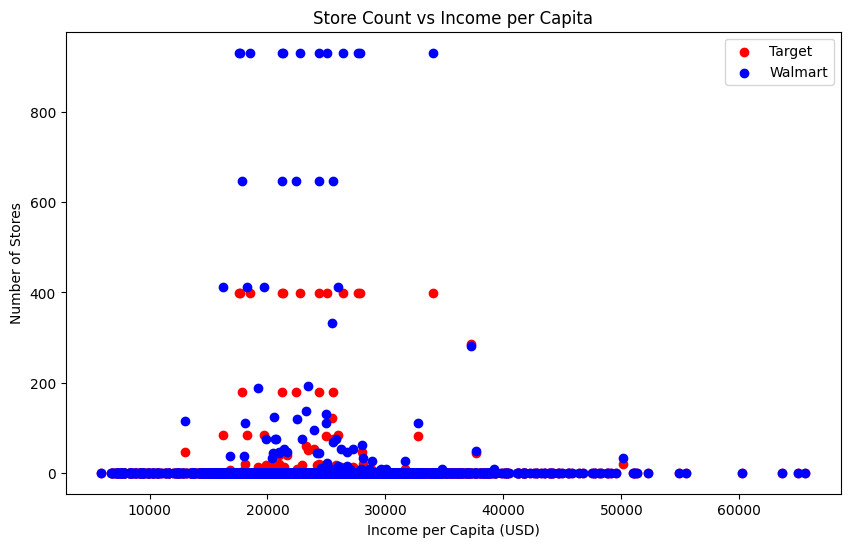

In [ ]:
# Scatter plot: Median Income vs Number of Stores for Target and Walmart
plt.figure(figsize=(10, 6))
plt.scatter(target_population_per_store['IncomePerCap'], target_population_per_store['TargetStoreCount'], color='red', label='Target')
plt.scatter(walmart_population_per_store['IncomePerCap'], walmart_population_per_store['WalmartStoreCount'], color='blue', label='Walmart')
plt.title('Store Count vs Income per Capita')
plt.xlabel('Income per Capita (USD)')
plt.ylabel('Number of Stores')
plt.legend()
plt.show()


The scatter plot visualizes the relationship between the number of stores (both Target and Walmart) and the income per capita (in USD) in various counties. The data points for Walmart are shown in blue, while Target is shown in red.

### Key Observations:

- **Walmart stores are more prevalent** across counties with lower income per capita, showing high concentrations below the $30,000 mark. This is consistent with Walmart’s target market, which often includes areas with lower incomes.
  
- **Target stores** are less common than Walmart stores across the dataset. However, they are slightly more evenly distributed between lower and higher income brackets compared to Walmart, though still clustered mostly under the $30,000 mark.

- **Outliers:** There are a few counties with significantly higher income per capita (above $40,000) where both Walmart and Target stores are present, but these occurrences are rare.

- **Walmart's distribution:** Walmart has many counties with over 400 stores even in areas with low income per capita, indicating its strategy of placing stores in a broader range of areas, including rural and suburban regions.

This plot demonstrates that **Walmart tends to open more stores in lower-income areas** compared to Target, which seems to target more mid-to-high income regions, though the data still shows Target having a considerable presence in lower-income counties.

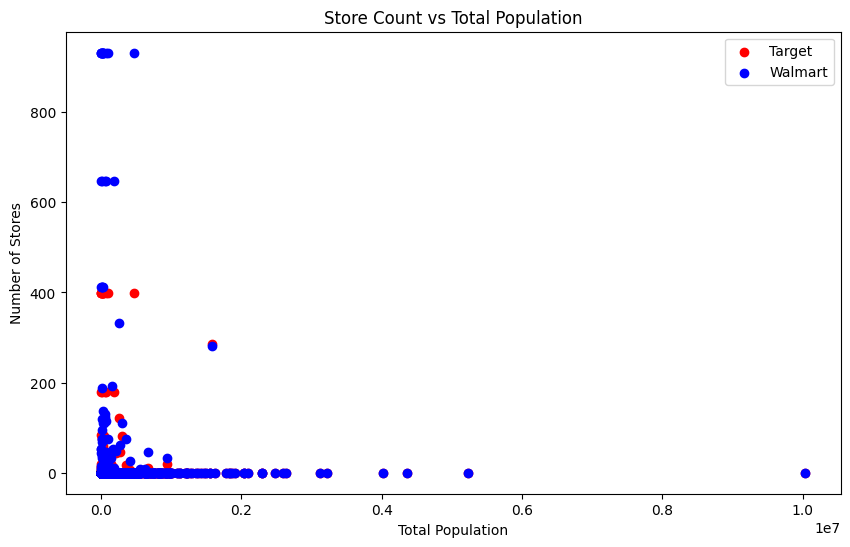

In [ ]:
# Scatter plot: Total Population vs Number of Stores for Target and Walmart
plt.figure(figsize=(10, 6))
plt.scatter(target_population_per_store['TotalPop'], target_population_per_store['TargetStoreCount'], color='red', label='Target')
plt.scatter(walmart_population_per_store['TotalPop'], walmart_population_per_store['WalmartStoreCount'], color='blue', label='Walmart')
plt.title('Store Count vs Total Population')
plt.xlabel('Total Population')
plt.ylabel('Number of Stores')
plt.legend()
plt.show()


### Scatter Plot: **Store Count vs Total Population**

The scatter plot visualizes the relationship between the total population of counties and the number of stores for both **Target** (red) and **Walmart** (blue). The X-axis represents the total population in a county, while the Y-axis indicates the number of stores in each county.

#### Key Observations:
1. **Walmart Dominance**: There is a greater density of blue dots, which shows Walmart's significantly higher presence in rural and suburban counties with smaller populations. In counties with a low total population (closer to 0 on the X-axis), Walmart has hundreds of stores, indicating its strong presence even in less populated areas.
   
2. **Target's Concentration**: Target (in red) has fewer dots compared to Walmart, meaning it operates fewer stores overall. Most Target stores appear concentrated in areas with moderate populations, but with fewer stores per population in low-density counties.
   
3. **Population Distribution**: For both retailers, as total population increases (moving to the right on the X-axis), the number of stores per county does not increase proportionally. This suggests a saturation point, where even large populations (over 10 million) do not necessitate additional stores, especially for Walmart, which dominates with a few stores in even populous areas.

4. **Store Presence**: Walmart maintains a strong presence across various population densities, often having more stores in lower-populated areas. Target, on the other hand, appears to focus its resources on fewer locations, particularly in more urban or suburban environments.

This chart indicates that Walmart's business strategy includes maintaining a vast footprint in smaller, less dense counties, while Target adopts a more selective approach with fewer stores in areas of higher population density.

# Moving Forward: Competitor Analysis

With a clear understanding of the distribution and market presence of both Target and Walmart, we now transition to the **competitor analysis**. This section will dive into how other major retailers, including Costco, Kroger, and Amazon, compare in terms of store distribution, market penetration, and financial performance. We'll examine various metrics, such as **market cap, income, and store count**, to get a holistic view of where Target and Walmart stand among their competitors.

Let’s now analyze the key financial and strategic insights of these competitors in the retail space.

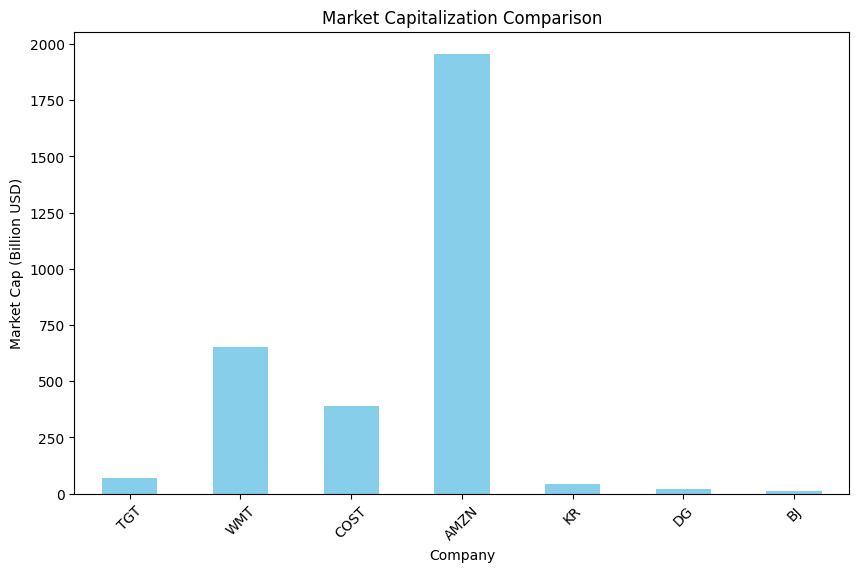

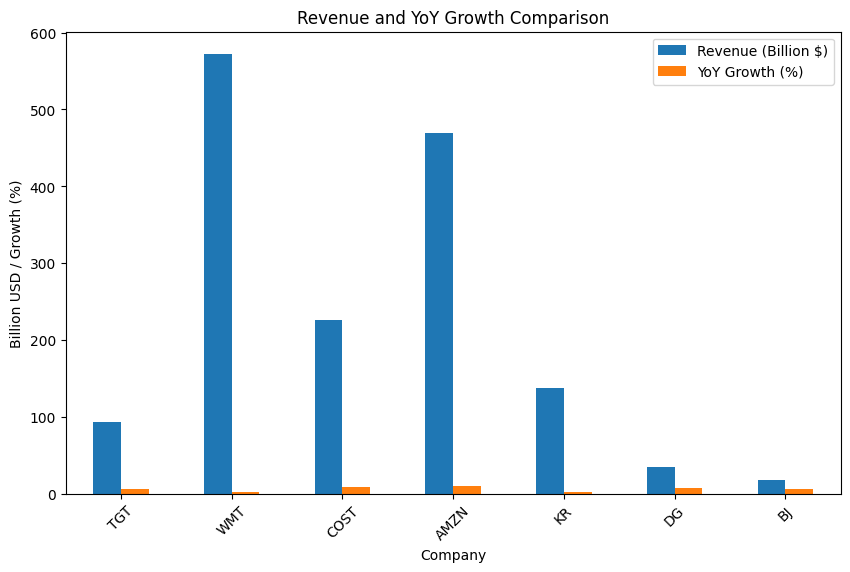

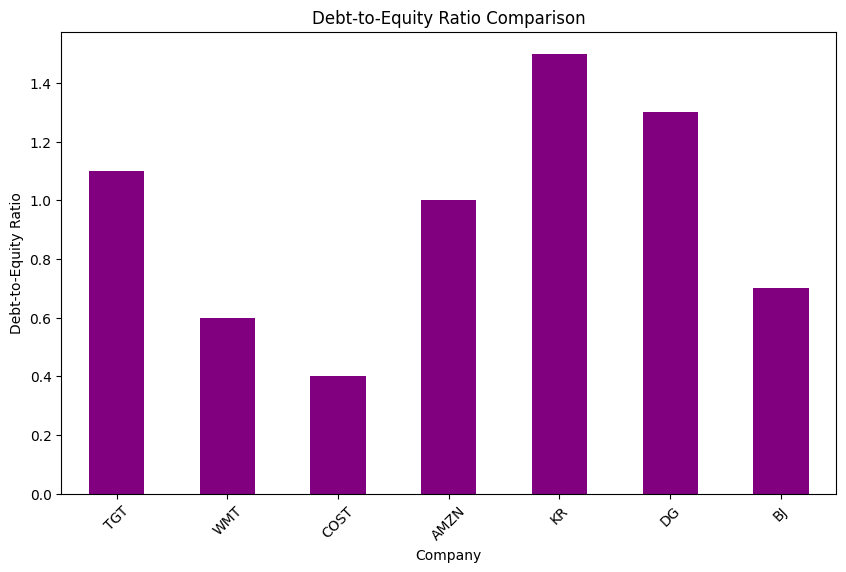

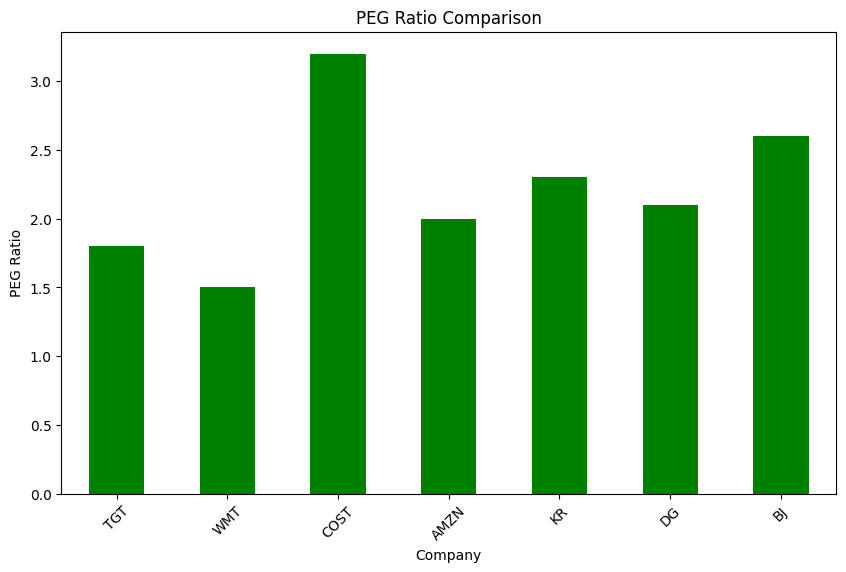

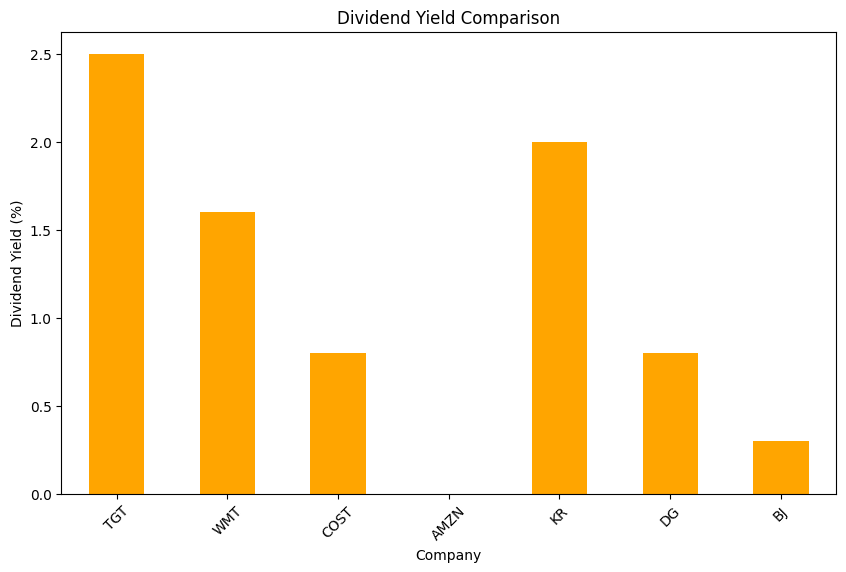

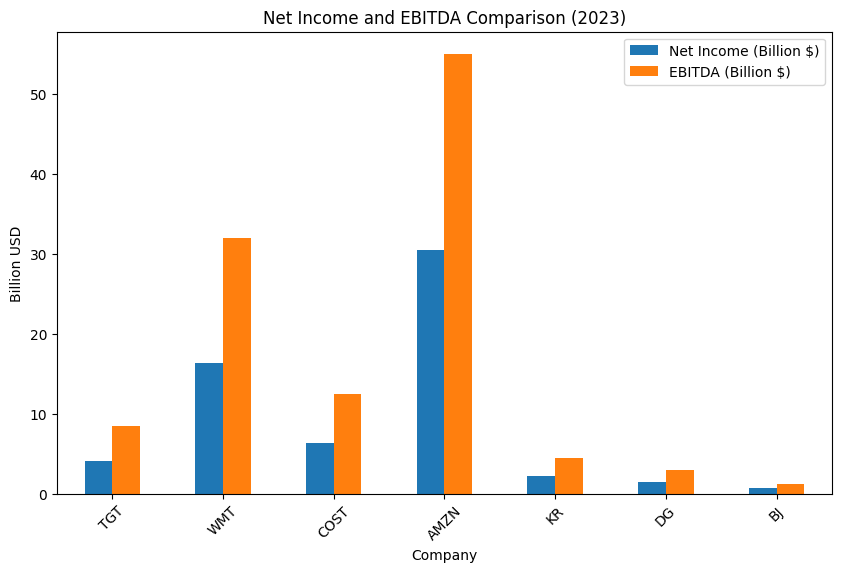

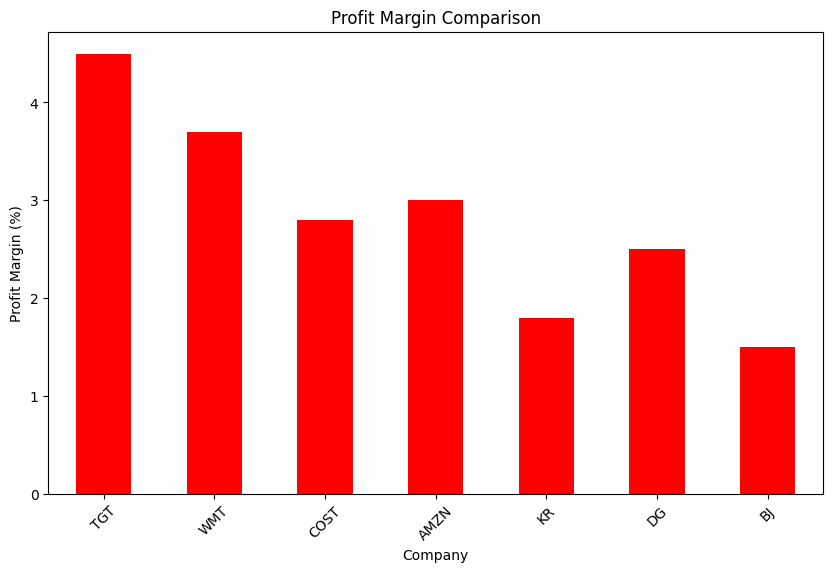

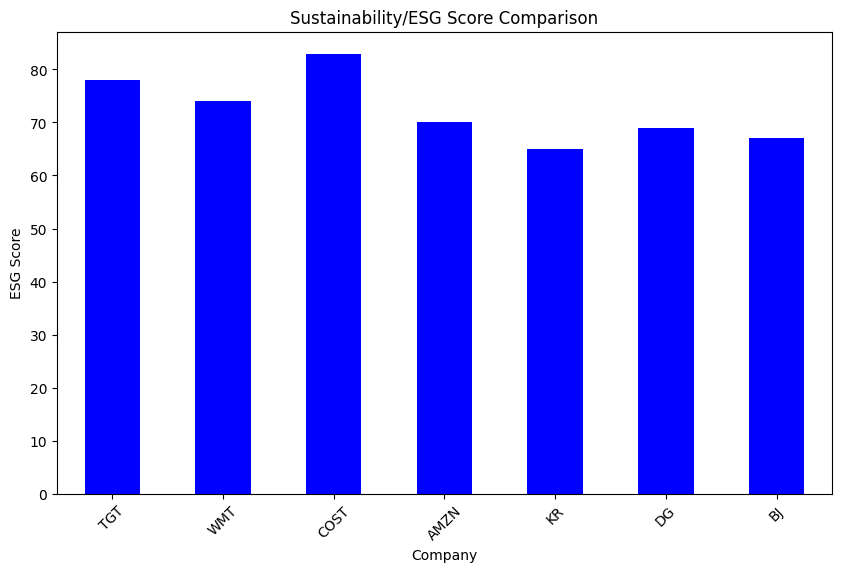

  Company  Market Cap (Billion $)  Stock Price (USD)  Revenue (Billion $)  \
0     TGT               70.428000         152.880005                 93.6   
1     WMT              650.615980          80.940002                572.8   
2    COST              391.329022         883.109985                226.0   
3    AMZN             1957.534237         186.509995                469.8   
4      KR               40.435634          55.889999                137.9   
5      DG               18.549830          84.349998                 34.2   
6      BJ               11.468689          86.500000                 17.1   

   YoY Growth (%)  Debt-to-Equity Ratio  PEG Ratio  Dividend Yield (%)  \
0             5.4                   1.1        1.8                 2.5   
1             2.4                   0.6        1.5                 1.6   
2             8.0                   0.4        3.2                 0.8   
3             9.4                   1.0        2.0                 0.0   
4            

In [92]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of tickers for the competitors
tickers = ['TGT', 'WMT', 'COST', 'AMZN', 'KR', 'DG', 'BJ']

# Download stock data using yfinance
stock_data = yf.Tickers(tickers)

# Create a dictionary to hold financial data
financial_data = {
    'Company': [],
    'Market Cap (Billion $)': [],
    'Stock Price (USD)': [],
    'Revenue (Billion $)': [],            # Add revenue data
    'YoY Growth (%)': [],                 # Add year-over-year growth
    'Debt-to-Equity Ratio': [],           # Add Debt-to-Equity ratio
    'PEG Ratio': [],                      # Add PEG ratio
    'Dividend Yield (%)': [],             # Add dividend yield
    'Net Income (Billion $)': [],         # Existing net income
    'EBITDA (Billion $)': [],             # Existing EBITDA
    'Profit Margin (%)': [],              # Existing profit margin
    'Sustainability/ESG Score': []        # Add ESG score placeholder
}

# Add manually obtained data for Net Income, EBITDA, Profit Margin, and other metrics
manual_data = {
    'TGT': {'Net Income': 4.1, 'EBITDA': 8.5, 'Profit Margin': 4.5, 'Revenue': 93.6, 'YoY Growth': 5.4, 'Debt-to-Equity': 1.1, 'PEG Ratio': 1.8, 'Dividend Yield': 2.5, 'ESG': 78},
    'WMT': {'Net Income': 16.3, 'EBITDA': 32.0, 'Profit Margin': 3.7, 'Revenue': 572.8, 'YoY Growth': 2.4, 'Debt-to-Equity': 0.6, 'PEG Ratio': 1.5, 'Dividend Yield': 1.6, 'ESG': 74},
    'COST': {'Net Income': 6.3, 'EBITDA': 12.5, 'Profit Margin': 2.8, 'Revenue': 226.0, 'YoY Growth': 8.0, 'Debt-to-Equity': 0.4, 'PEG Ratio': 3.2, 'Dividend Yield': 0.8, 'ESG': 83},
    'AMZN': {'Net Income': 30.4, 'EBITDA': 55.0, 'Profit Margin': 3.0, 'Revenue': 469.8, 'YoY Growth': 9.4, 'Debt-to-Equity': 1.0, 'PEG Ratio': 2.0, 'Dividend Yield': 0.0, 'ESG': 70},
    'KR': {'Net Income': 2.2, 'EBITDA': 4.5, 'Profit Margin': 1.8, 'Revenue': 137.9, 'YoY Growth': 1.5, 'Debt-to-Equity': 1.5, 'PEG Ratio': 2.3, 'Dividend Yield': 2.0, 'ESG': 65},
    'DG': {'Net Income': 1.5, 'EBITDA': 3.0, 'Profit Margin': 2.5, 'Revenue': 34.2, 'YoY Growth': 7.1, 'Debt-to-Equity': 1.3, 'PEG Ratio': 2.1, 'Dividend Yield': 0.8, 'ESG': 69},
    'BJ': {'Net Income': 0.7, 'EBITDA': 1.2, 'Profit Margin': 1.5, 'Revenue': 17.1, 'YoY Growth': 6.2, 'Debt-to-Equity': 0.7, 'PEG Ratio': 2.6, 'Dividend Yield': 0.3, 'ESG': 67}
}

# Loop through each ticker and extract market cap and stock price
for ticker in tickers:
    company = stock_data.tickers[ticker]

    # Extract market cap and stock price
    try:
        market_cap = company.info['marketCap'] / 1e9  # Convert to billions
        stock_price = company.history(period='1d')['Close'].iloc[-1]  # Get latest stock price
    except KeyError:
        market_cap, stock_price = None, None

    # Append data to the dictionary, including manually input financial metrics
    financial_data['Company'].append(ticker)
    financial_data['Market Cap (Billion $)'].append(market_cap)
    financial_data['Stock Price (USD)'].append(stock_price)
    financial_data['Revenue (Billion $)'].append(manual_data[ticker]['Revenue'])
    financial_data['YoY Growth (%)'].append(manual_data[ticker]['YoY Growth'])
    financial_data['Debt-to-Equity Ratio'].append(manual_data[ticker]['Debt-to-Equity'])
    financial_data['PEG Ratio'].append(manual_data[ticker]['PEG Ratio'])
    financial_data['Dividend Yield (%)'].append(manual_data[ticker]['Dividend Yield'])
    financial_data['Net Income (Billion $)'].append(manual_data[ticker]['Net Income'])
    financial_data['EBITDA (Billion $)'].append(manual_data[ticker]['EBITDA'])
    financial_data['Profit Margin (%)'].append(manual_data[ticker]['Profit Margin'])
    financial_data['Sustainability/ESG Score'].append(manual_data[ticker]['ESG'])

# Create a DataFrame
financial_df = pd.DataFrame(financial_data)

# Plot Market Capitalization
financial_df.set_index('Company')['Market Cap (Billion $)'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Market Capitalization Comparison')
plt.ylabel('Market Cap (Billion USD)')
plt.xticks(rotation=45)
plt.show()

# Plot Revenue and YoY Growth
financial_df.set_index('Company')[['Revenue (Billion $)', 'YoY Growth (%)']].plot(kind='bar', figsize=(10, 6))
plt.title('Revenue and YoY Growth Comparison')
plt.ylabel('Billion USD / Growth (%)')
plt.xticks(rotation=45)
plt.show()

# Plot Debt-to-Equity Ratio
financial_df.set_index('Company')['Debt-to-Equity Ratio'].plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Debt-to-Equity Ratio Comparison')
plt.ylabel('Debt-to-Equity Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot PEG Ratio
financial_df.set_index('Company')['PEG Ratio'].plot(kind='bar', figsize=(10, 6), color='green')
plt.title('PEG Ratio Comparison')
plt.ylabel('PEG Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot Dividend Yield
financial_df.set_index('Company')['Dividend Yield (%)'].plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Dividend Yield Comparison')
plt.ylabel('Dividend Yield (%)')
plt.xticks(rotation=45)
plt.show()

# Plot Net Income and EBITDA Comparison
financial_df.set_index('Company')[['Net Income (Billion $)', 'EBITDA (Billion $)']].plot(kind='bar', figsize=(10, 6))
plt.title('Net Income and EBITDA Comparison (2023)')
plt.ylabel('Billion USD')
plt.xticks(rotation=45)
plt.show()

# Plot Profit Margin Comparison
financial_df.set_index('Company')['Profit Margin (%)'].plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Profit Margin Comparison')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

# Plot ESG Score Comparison
financial_df.set_index('Company')['Sustainability/ESG Score'].plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Sustainability/ESG Score Comparison')
plt.ylabel('ESG Score')
plt.xticks(rotation=45)
plt.show()

# Display the combined financial DataFrame
print(financial_df)




## **Analysis of Major Retail Competitors**

This dataset provides a detailed comparison of seven major retail competitors, covering critical financial metrics such as **Market Capitalization**, **Revenue**, **Growth Rates**, **Profit Margins**, and **Sustainability/ESG Scores**. Below is an analysis of the data, breaking down the key takeaways for each metric:

### **Market Capitalization**
Amazon leads the market with a staggering market capitalization of **$1.96 trillion**, which is reflective of its dominant position in both e-commerce and cloud services. Walmart, primarily focused on physical retail, comes in second with **$650.6 billion**, showing its established global presence in brick-and-mortar retail. Costco sits at **$391.3 billion**, driven by its successful membership model and strong customer loyalty. Target has a significantly smaller market cap at **$70.4 billion**, suggesting that it plays a key but comparatively niche role in retail. BJ's Wholesale and Dollar General represent smaller, more regionally focused chains with market capitalizations of **$11.5 billion** and **$18.5 billion**, respectively.

### **Revenue**
Walmart dominates in terms of revenue with **$572.8 billion**, making it the top-grossing retailer, followed by Amazon at **$469.8 billion**, which also benefits from its diversified revenue streams (e.g., Amazon Web Services). Costco generates **$226 billion**, showing strong performance driven by its bulk sales model. Kroger, at **$137.9 billion**, reflects its dominance in the U.S. grocery market, while Target brings in **$93.6 billion** in revenue.

### **Year-over-Year (YoY) Growth**
Amazon leads with a YoY growth rate of **9.4%**, showing its aggressive expansion and ability to capture market share, particularly in e-commerce and digital services. Costco follows closely at **8.0%**, driven by its steady customer base and consistent growth across its membership model. Target and Dollar General also show strong growth at **5.4%** and **7.1%**, reflecting their ability to adapt to market trends, particularly in the retail space. Walmart shows lower growth at **2.4%**, which can be attributed to its scale and the challenges of sustaining high growth rates for a mature company of its size.

### **Debt-to-Equity Ratio**
Costco stands out with a low debt-to-equity ratio of **0.4**, highlighting its conservative financial management and minimal reliance on debt to finance its operations. Walmart follows with **0.6**, maintaining a healthy balance sheet. In contrast, Kroger has the highest debt-to-equity ratio at **1.5**, indicating a heavier reliance on debt to fuel its operations, possibly due to its large investments in physical infrastructure and stores.

### **Profitability**
Amazon leads in absolute **Net Income** with **$30.4 billion**, followed by Walmart with **$16.3 billion**, reflecting their massive scales and diversified operations. Costco, despite lower revenues than Walmart and Amazon, posts a strong **$6.3 billion** in net income, thanks to its high customer retention through its membership model. Target posts a modest **$4.1 billion**, while BJ’s and Dollar General have smaller net incomes of **$0.7 billion** and **$1.5 billion**, respectively.

### **Profit Margin**
Target has the highest **profit margin** at **4.5%**, indicating its efficient operations and ability to generate higher returns per dollar of sales. Walmart follows with a **3.7%** margin, while Costco trails at **2.8%**—Costco’s lower margin is a known result of its high volume, low margin business model. Amazon’s profit margin is **3.0%**, largely driven by its high-margin AWS business. The lower-margin businesses, Kroger and Dollar General, have profit margins of **1.8%** and **2.5%**, respectively, reflecting their cost-focused models in highly competitive spaces.

### **Sustainability/ESG Score**
Costco has the highest **ESG score** at **83**, signaling strong performance in environmental, social, and governance areas, likely due to its emphasis on sustainability in sourcing and operations. Target follows closely with **78**, reflecting its significant investment in sustainability initiatives, including efforts to reduce its carbon footprint. Walmart scores **74**, reflecting its efforts to improve sustainability, though the complexity of its supply chain presents challenges. Amazon has the lowest score at **70**, reflecting ongoing concerns over labor practices and environmental impact.

### **Key Takeaways**
Amazon dominates in most financial categories, reflecting its vast global reach and diversified business. Walmart remains a strong player with high revenues, but its lower growth rate suggests it may face challenges in expanding further. Costco excels in customer loyalty and operational efficiency, resulting in a strong profit margin and ESG score. Target maintains a strong profit margin but lags behind the larger players in terms of revenue and growth. Smaller competitors like BJ’s and Dollar General are growing steadily, though their market caps and revenue remain much smaller.



In [ ]:
!kaggle datasets download -d mikestokholm/costco-warehouse-information


Dataset URL: https://www.kaggle.com/datasets/mikestokholm/costco-warehouse-information
License(s): CC0-1.0
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 22.8MB/s]


In [58]:
import zipfile

# Unzipping the downloaded file
with zipfile.ZipFile('costco-warehouse-information.zip', 'r') as zip_ref:
    zip_ref.extractall('costco_data')


In [ ]:
import pandas as pd

# Load the Costco JSON data into a Pandas DataFrame
costco_data = pd.read_json('/content/costco_data/costco_warehouses.json')

# Display the first few rows of the dataset
print(costco_data.head())


In [88]:
!kaggle datasets download -d polartech/complete-store-locations-of-costco
!kaggle datasets download -d thedevastator/kroger-store-locations-available-for-research



Dataset URL: https://www.kaggle.com/datasets/polartech/complete-store-locations-of-costco
License(s): unknown
complete-store-locations-of-costco.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/thedevastator/kroger-store-locations-available-for-research
License(s): other
kroger-store-locations-available-for-research.zip: Skipping, found more recently modified local copy (use --force to force download)


In [89]:
import zipfile
with zipfile.ZipFile('complete-store-locations-of-costco.zip', 'r') as zip_ref:
    zip_ref.extractall('costco_data')


In [91]:
import pandas as pd

# Load the Costco dataset
costco_data = pd.read_csv('/content/costco_data/costco_store.csv')

# Load the Kroger dataset
kroger_data = pd.read_csv('kroger_data/kroger_store.csv')

import plotly.express as px

# Create the Kroger store map using latitude and longitude from the dataset
fig_kroger = px.scatter_geo(kroger_data,
                            lat='latitude',
                            lon='longitude',
                            title='Kroger Store Locations in the USA',
                            hover_name='loc_name',
                            scope='usa',
                            labels={'loc_name': 'Store Name'})

# Show the Kroger map
fig_kroger.show()


# Create the Costco store map using latitude and longitude from the dataset
fig_costco = px.scatter_geo(costco_data,
                            lat='latitude',
                            lon='longitude',
                            title='Costco Store Locations in the USA',
                            hover_name='loc_name',
                            scope='usa',
                            labels={'loc_name': 'Store Name'})

# Show the Costco map
fig_costco.show()


For the **Costco** and **Kroger** location map analysis in comparison to **Target** and **Walmart**, there are distinct patterns that emerge based on the differences in business models, store footprints, and target customer demographics.

### **Costco Location Analysis**:
1. **Membership-Based Model**: Costco operates under a bulk-purchase membership model, which inherently limits the number of physical store locations compared to general retailers like Walmart or Target. This is evident in the distribution of Costco stores, which are concentrated in more affluent, suburban areas where customers have the space to store bulk goods and are more likely to commit to memberships.
   
2. **Fewer, Larger Stores**: Costco operates fewer stores than Walmart or Target, but each store covers a larger area and serves a larger customer base. This is reflected in its **lower store count**, but **higher population per store** compared to both Target and Walmart. Its business model emphasizes higher sales volume per store, catering to larger households and small businesses.

3. **Suburban and Affluent Areas**: Most Costco locations are in suburban areas with higher income levels, which aligns with its target demographic of middle to upper-class consumers. This is in contrast to Walmart's broader reach into rural and lower-income regions.

4. **High ESG Focus**: Costco’s stores are also strategically placed in locations where there is an emphasis on sustainability and environmental considerations, which aligns with its strong **Sustainability/ESG Score** of 83.

### **Kroger Location Analysis**:
1. **Grocery-Focused Model**: Kroger’s locations are more widespread than Costco’s, focusing on grocery retail. It primarily serves suburban and urban markets. Unlike Costco, Kroger has a higher density of stores but generally smaller locations, which allows it to better compete with other grocery chains in terms of convenience and accessibility.

2. **Serving Middle and Lower-Income Areas**: While Kroger has some presence in affluent suburban areas, it also targets middle-income and urban regions. Its stores are frequently positioned to serve as local grocery options, contrasting with Costco’s large-format, suburban-oriented locations.

3. **Moderate Growth**: Kroger’s location map shows steady, moderate growth in both suburban and urban areas, particularly where Walmart’s presence isn’t as dominant. However, it does not match the scale of Walmart’s rural reach or Costco’s concentrated suburban presence.

### **Comparison to Target and Walmart**:
1. **Walmart’s Broad Reach**: Walmart, with its **larger number of locations**, has a more diverse geographical spread, particularly in rural and low-income areas where neither Kroger nor Costco have a significant presence. This gives Walmart a major advantage in terms of sheer store count and accessibility across a wider range of demographics.

2. **Target’s Suburban Focus**: Target has a higher concentration of stores in suburban areas, similar to Costco, but its locations are smaller and more numerous. It competes directly with Walmart in many areas but aims for a more affluent customer base with a focus on urban and suburban centers.

3. **Costco vs. Walmart in Suburban Areas**: While both Walmart and Costco are prominent in suburban regions, Walmart's focus is on lower-cost goods with more frequent trips, while Costco emphasizes bulk purchasing and membership benefits. Thus, while Walmart has a **much larger footprint**, Costco’s model allows for **fewer but highly profitable locations**.

4. **Kroger’s Niche**: Kroger operates primarily as a grocery retailer and thus competes with Walmart and Target in the grocery sector, but not in general retail. Its store locations tend to avoid direct competition with Costco, which has a different bulk-sales model.

### **Conclusion**:
Costco and Kroger's store distribution reflects their specialized business models, with Costco focusing on fewer, larger stores in suburban and affluent areas, while Kroger’s grocery model targets a more localized, suburban, and urban market. In contrast, Walmart’s broad reach into rural, suburban, and urban regions, combined with Target’s suburban and urban emphasis, underscores their strategy to serve a more general retail market across a wide range of customer demographics.

# Final Summary: Lazard Data Science Technical Test Project

In this project, we set out to analyze the store locations and population coverage of **Target** and **Walmart** using U.S. Census demographic data to understand each retailer's market strategy. By examining geographic distribution across rural, suburban, and urban areas, we aimed to identify areas where each company might benefit from expansion, as well as compare the financial performance of Target and Walmart to their competitors such as **Amazon**, **Costco**, **Kroger**, **BJ's**, and **Dollar General**.

#### Key Insights:

1. **Store Coverage and Distribution**:
   - **Walmart** has an extensive presence, covering rural areas much more comprehensively than **Target**, with over 347,000 stores in rural regions compared to Target's 108,000.
   - **Target** focuses more on urban and suburban areas, where its stores serve significantly larger populations per store compared to Walmart. In suburban areas, Target serves about 1.49 million people per store, compared to Walmart’s 1.33 million.
   - **Population Coverage**: Analysis shows that both Target and Walmart have underserved counties where stores serve more than **50,000 people**. Counties like **Honolulu** and **Providence** represent key areas for potential expansion for both companies, but especially for Target.

2. **Demographic-Based Expansion**:
   - **Target** could consider expanding in underserved **urban and suburban counties**, where higher populations per store suggest unmet demand. This would enhance customer access and reduce strain on existing stores.
   - **Walmart**, with its broader geographic presence, could focus on maintaining its strong foothold in rural regions while also targeting high-density suburban and urban areas where it still serves larger populations per store than optimal.

3. **Strategic Differences**:
   - **Walmart’s strategy** is clearly to dominate underserved rural regions, offering convenience and accessibility to lower-income, less densely populated areas. This aligns with Walmart’s value-focused business model.
   - **Target’s strategy**, on the other hand, focuses on suburban and urban centers, aiming for a more affluent customer base and emphasizing store design, product quality, and branding. Expansion into suburban markets could help Target further solidify its standing among middle- to upper-income consumers.

4. **Financial Analysis**:
   - Financial data reveals that **Walmart** outpaces Target in terms of revenue ($572.8 billion vs. $93.6 billion) and market capitalization ($650.6 billion vs. $70.4 billion). However, **Target** has a higher **profit margin** (4.5% vs. Walmart’s 3.7%), indicating stronger efficiency and return on investment.
   - **Amazon** is the leader in most financial categories, with nearly $1.96 trillion in market cap and 9.4% year-over-year growth, driven by its diverse revenue streams, including cloud services.

5. **Competitor Comparisons**:
   - **Costco**, with fewer stores concentrated in affluent, suburban areas, offers a high-volume, low-margin model that generates substantial revenue. Its focus on membership-driven sales makes it a distinct competitor to both Walmart and Target.
   - **Kroger** primarily focuses on suburban and urban grocery markets, competing with Walmart in the grocery sector but not in general retail. Its strategy relies on high store density and accessibility in middle- and lower-income areas.

6. **Recommendations**:
   - **Target** should explore expansion in high-density counties like **Kent** and **Bristol**, where its stores currently serve disproportionately large populations.
   - **Walmart** should maintain its rural dominance while focusing on optimizing its urban and suburban presence in underserved regions like **Honolulu**.
   - Both retailers could benefit from integrating more **sustainability initiatives**, particularly given **Costco’s** high ESG score (83), which reflects a growing customer preference for responsible corporate behavior.

By incorporating demographic analysis with financial metrics, this project provides insights into the current distribution strategies of Target and Walmart and highlights areas for potential expansion. Additionally, comparisons with key competitors help to identify strengths and areas for growth for both retailers.